In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
import openpocket as opo
import numpy as np
import matplotlib.pyplot as plt
from simtk.unit import angstroms
import nglview as nv

_ColormakerRegistry()

In [3]:
molecular_system = msm.convert('1rob.pdb')

In [4]:
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_waters,n_peptides,n_frames
molsysmt.MolSys,1073,226,103,2,103,2,101,1,1


In [6]:
molecular_system = msm.extract(molecular_system, selection='molecule_type=="peptide"')

In [7]:
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_frames
molsysmt.MolSys,951,124,1,1,1,1,1,1


In [9]:
alpha_spheres_set = opo.get_alpha_spheres_set(molecular_system, selection='atom_type!="H"')

In [10]:
alpha_spheres_set.n_alpha_spheres

6088

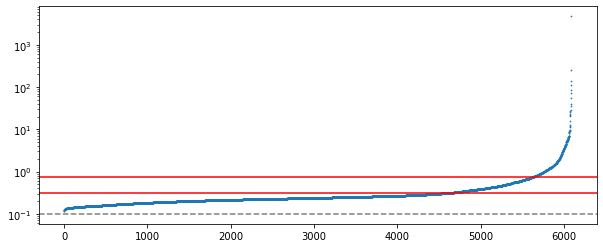

In [11]:
plt.rcParams["figure.figsize"] = (10,4)
plt.scatter(range(alpha_spheres_set.n_alpha_spheres), np.sort(alpha_spheres_set.radii), s=0.5)
plt.axhline(y=0.1, color='gray', linestyle='--')
plt.axhline(y=0.32, color='red', linestyle='-') # minimum to prefilter
plt.axhline(y=0.76, color='red', linestyle='-') # minimum to prefilter
plt.yscale('log')

In [12]:
alpha_spheres_set.remove_small_alpha_spheres(3.2*angstroms)
alpha_spheres_set.remove_big_alpha_spheres(7.6*angstroms)

In [13]:
alpha_spheres_set.n_alpha_spheres

964

In [20]:
view = nv.show_molsysmt(molecular_system)
view.clear()
view.add_surface(color='white', opacity=0.7)
view.add_licorice(color='red')
view

NGLWidget()